In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import to_categorical
# from keras_preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [ ]:
# TRAIN_DIR = '/content/drive/MyDrive/images/train'
# TEST_DIR = '/content/drive/MyDrive/images/test'
TRAIN_DIR = '/content/drive/MyDrive/img_exp/train'
TEST_DIR = '/content/drive/MyDrive/img_exp/test'

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed


In [ ]:
print(train)

                                                 image  label
0    /content/drive/MyDrive/img_exp/train/happy/100...  happy
1    /content/drive/MyDrive/img_exp/train/happy/100...  happy
2    /content/drive/MyDrive/img_exp/train/happy/100...  happy
3    /content/drive/MyDrive/img_exp/train/happy/100...  happy
4    /content/drive/MyDrive/img_exp/train/happy/100...  happy
..                                                 ...    ...
223  /content/drive/MyDrive/img_exp/train/sad/10753...    sad
224  /content/drive/MyDrive/img_exp/train/sad/10767...    sad
225  /content/drive/MyDrive/img_exp/train/sad/10780...    sad
226  /content/drive/MyDrive/img_exp/train/sad/10754...    sad
227  /content/drive/MyDrive/img_exp/train/sad/10720...    sad

[228 rows x 2 columns]


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
sad completed


In [ ]:
print(test)
print(test['image'])

                                                 image  label
0    /content/drive/MyDrive/img_exp/test/happy/1012...  happy
1    /content/drive/MyDrive/img_exp/test/happy/1027...  happy
2    /content/drive/MyDrive/img_exp/test/happy/1001...  happy
3    /content/drive/MyDrive/img_exp/test/happy/1002...  happy
4    /content/drive/MyDrive/img_exp/test/happy/1024...  happy
..                                                 ...    ...
233  /content/drive/MyDrive/img_exp/test/sad/12648.jpg    sad
234  /content/drive/MyDrive/img_exp/test/sad/12758.jpg    sad
235  /content/drive/MyDrive/img_exp/test/sad/13339.jpg    sad
236  /content/drive/MyDrive/img_exp/test/sad/13421.jpg    sad
237  /content/drive/MyDrive/img_exp/test/sad/13091.jpg    sad

[238 rows x 2 columns]
0      /content/drive/MyDrive/img_exp/test/happy/1012...
1      /content/drive/MyDrive/img_exp/test/happy/1027...
2      /content/drive/MyDrive/img_exp/test/happy/1001...
3      /content/drive/MyDrive/img_exp/test/happy/1002...
4   

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale' )
        img = np.array(img) # loaded img to numpy array
        features.append(img) # processed eary to features list
    features = np.array(features) # list of img arrays in single numpy array
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/228 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/238 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
LabelEncoder()

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 2)
y_test = to_categorical(y_test,num_classes = 2)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
# model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 26s 12s/step - accuracy: 0.4587 - loss: 0.7077 - val_accuracy: 0.4916 - val_loss: 0.6941
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.5478 - loss: 0.6961 - val_accuracy: 0.4916 - val_loss: 0.6933
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5588 - loss: 0.6906 - val_accuracy: 0.5084 - val_loss: 0.6932
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5172 - loss: 0.6971 - val_accuracy: 0.5084 - val_loss: 0.6930
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5026 - loss: 0.7003 - val_accuracy: 0.5084 - val_loss: 0.6930
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5367 - loss: 0.6888 - val_accuracy: 0.5084 - val_loss: 0.6930
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5449 - loss: 0.6892 - val_accuracy: 0.5084 - val_loss: 0.6931
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4467 - loss: 0.6958 - val_accuracy: 0.5084 - val_loss:

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [ ]:
# label = ['angry','disgust','fear','happy','neutral','sad','surprise']
label = ['happy','sad']

In [ ]:
def ef(image):
    img = load_img(image, color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
# image = 'images/train/sad/42.jpg'
image = '/content/drive/MyDrive/img_exp/train/happy/100.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
model prediction is  sad


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
model prediction is  sad


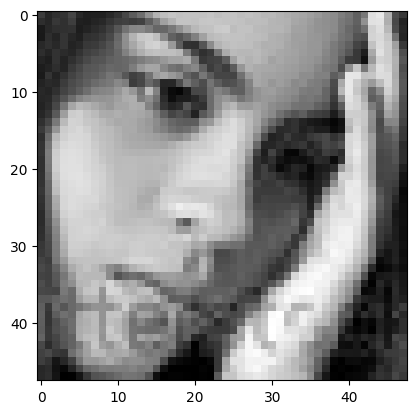

In [ ]:
image = '/content/drive/MyDrive/img_exp/train/sad/1001.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')